In [ ]:
import wfdb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os

#Cargar datos

In [2]:
# Cargar el archivo CSV con las features RR
df = pd.read_csv("ecg_rr_features_curado.csv")

# Quitar espacios en blanco por si acaso
df['label'] = df['label'].str.strip()

# Filtrar solo las clases que nos interesan: Normal y AFib
df_filtrado = df[df['label'].isin(['Normal', 'AFib'])]

# Mostrar conteo por clase
conteo = df_filtrado['label'].value_counts()
print("Distribución de clases:\n", conteo)

# Determinar el mínimo (por si alguna clase tiene menos de 15)
minimo = min(15, int(conteo.min()))

# Tomar muestras
muestra_normal = df_filtrado[df_filtrado['label'] == 'Normal'].sample(n=minimo, random_state=42)
muestra_afib = df_filtrado[df_filtrado['label'] == 'AFib'].sample(n=minimo, random_state=42)

# Combinar y mezclar
muestra_balanceada = pd.concat([muestra_normal, muestra_afib]).sample(frac=1, random_state=42).reset_index(drop=True)

# Guardar a CSV
muestra_balanceada.to_csv("ecg_muestra_balanceada.csv", index=False)

print("✅ Muestra balanceada creada con éxito: ecg_muestra_balanceada.csv")
print(muestra_balanceada['label'].value_counts())


Distribución de clases:
 label
Normal    5050
AFib       738
Name: count, dtype: int64
✅ Muestra balanceada creada con éxito: ecg_muestra_balanceada.csv
label
AFib      15
Normal    15
Name: count, dtype: int64


In [3]:
# Parámetro de frecuencia
fs = 300  # Hz

# === 1. Cargar etiquetas desde la muestra balanceada ===
df_ref = pd.read_csv('ecg_muestra_balanceada.csv')

# Renombrar columna si es necesario (asegurar que sea "id" y "label")
df_ref.columns = ['id', 'f1', 'f2', 'f3', 'f4', 'label']

# Filtrar clases válidas: solo "Normal" y "AFib"
df_ref = df_ref[df_ref['label'].isin(['Normal', 'AFib'])].reset_index(drop=True)

# Verificar contenido
print("✅ Datos cargados correctamente.\n")
print(df_ref.head())

✅ Datos cargados correctamente.

       id          f1          f2        f3        f4   label
0  A06397  613.546099  199.898797  1.168773  1.350203    AFib
1  A02900  383.244444  127.736967  1.619724  3.183308    AFib
2  A05366  531.851852   75.598209  0.668771  0.890665    AFib
3  A02375  577.687075  145.318797  1.677749  3.186396    AFib
4  A04689  999.642857   62.781678  1.335801  0.459524  Normal


In [4]:
print("\n--- Inspección básica ---")
print("\n.describe():")
print(df_ref.describe(include='all'))

print("\nTipos de datos:")
print(df_ref.dtypes)


--- Inspección básica ---

.describe():
            id           f1          f2         f3         f4 label
count       30    30.000000   30.000000  30.000000  30.000000    30
unique      30          NaN         NaN        NaN        NaN     2
top     A06397          NaN         NaN        NaN        NaN  AFib
freq         1          NaN         NaN        NaN        NaN    15
mean       NaN   802.005397   97.708348   0.106184   1.674042   NaN
std        NaN   245.209851   67.097005   1.341723   4.743288   NaN
min        NaN   383.244444   13.656897  -3.718210  -1.088567   NaN
25%        NaN   589.324904   39.889314  -0.482938  -0.743942   NaN
50%        NaN   796.694678   84.084199  -0.005178   0.406078   NaN
75%        NaN  1009.196429  141.262828   0.808692   1.684202   NaN
max        NaN  1216.666667  247.163042   3.944970  21.233389   NaN

Tipos de datos:
id        object
f1       float64
f2       float64
f3       float64
f4       float64
label     object
dtype: object


C:\Users\56984\AppData\Local\Temp\ipykernel_14424\4059101364.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_ref, x='label', palette='pastel')


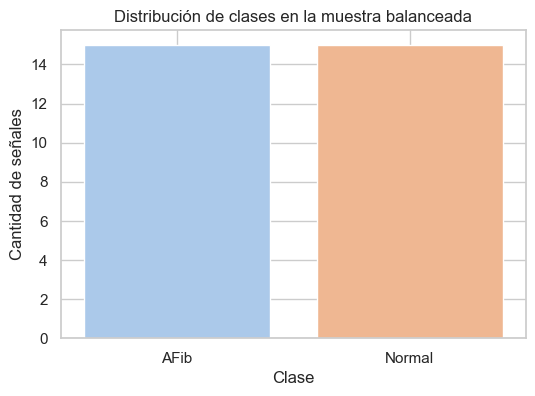

In [12]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(data=df_ref, x='label', palette='pastel')
plt.title('Distribución de clases en la muestra balanceada')
plt.xlabel('Clase')
plt.ylabel('Cantidad de señales')
plt.grid(True)
plt.show()


In [13]:
def mostrar_varias_senales(df, num=6, fs=300):
    plt.figure(figsize=(12, num * 2.5))
    ruta_ecg = "C:/Users/56984/OneDrive - Universidad de Talca/Escritorio/training2017"

    for i, row in df.head(num).iterrows():
        try:
            ruta_completa = os.path.join(ruta_ecg, row['id'])
            record = wfdb.rdrecord(ruta_completa)
            signal = record.p_signal[:fs * 10].flatten()  # primeros 10 segundos
            tiempo = np.arange(len(signal)) / fs

            plt.subplot(num, 1, i + 1)
            plt.plot(tiempo, signal, color='blue' if row['label'] == 'Normal' else 'red')
            plt.title(f"ECG: {row['id']} - Clase: {row['label']}")
            plt.xlabel("Tiempo (segundos)")
            plt.ylabel("Amplitud (mV)")
            plt.grid(True)
        except Exception as e:
            print(f"⚠️ No se pudo cargar {row['id']}: {e}")
            continue

    plt.tight_layout()
    plt.show()


Resumen del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       30 non-null     object 
 1   mean_rr  30 non-null     float64
 2   std_rr   30 non-null     float64
 3   skew_rr  30 non-null     float64
 4   kurt_rr  30 non-null     float64
 5   label    30 non-null     object 
dtypes: float64(4), object(2)
memory usage: 1.5+ KB
None

Primeras filas:
       id     mean_rr      std_rr   skew_rr   kurt_rr   label
0  A06397  613.546099  199.898797  1.168773  1.350203    AFib
1  A02900  383.244444  127.736967  1.619724  3.183308    AFib
2  A05366  531.851852   75.598209  0.668771  0.890665    AFib
3  A02375  577.687075  145.318797  1.677749  3.186396    AFib
4  A04689  999.642857   62.781678  1.335801  0.459524  Normal

Resumen estadístico:
           mean_rr      std_rr    skew_rr    kurt_rr
count    30.000000   30.000000  30.000000  30.00000

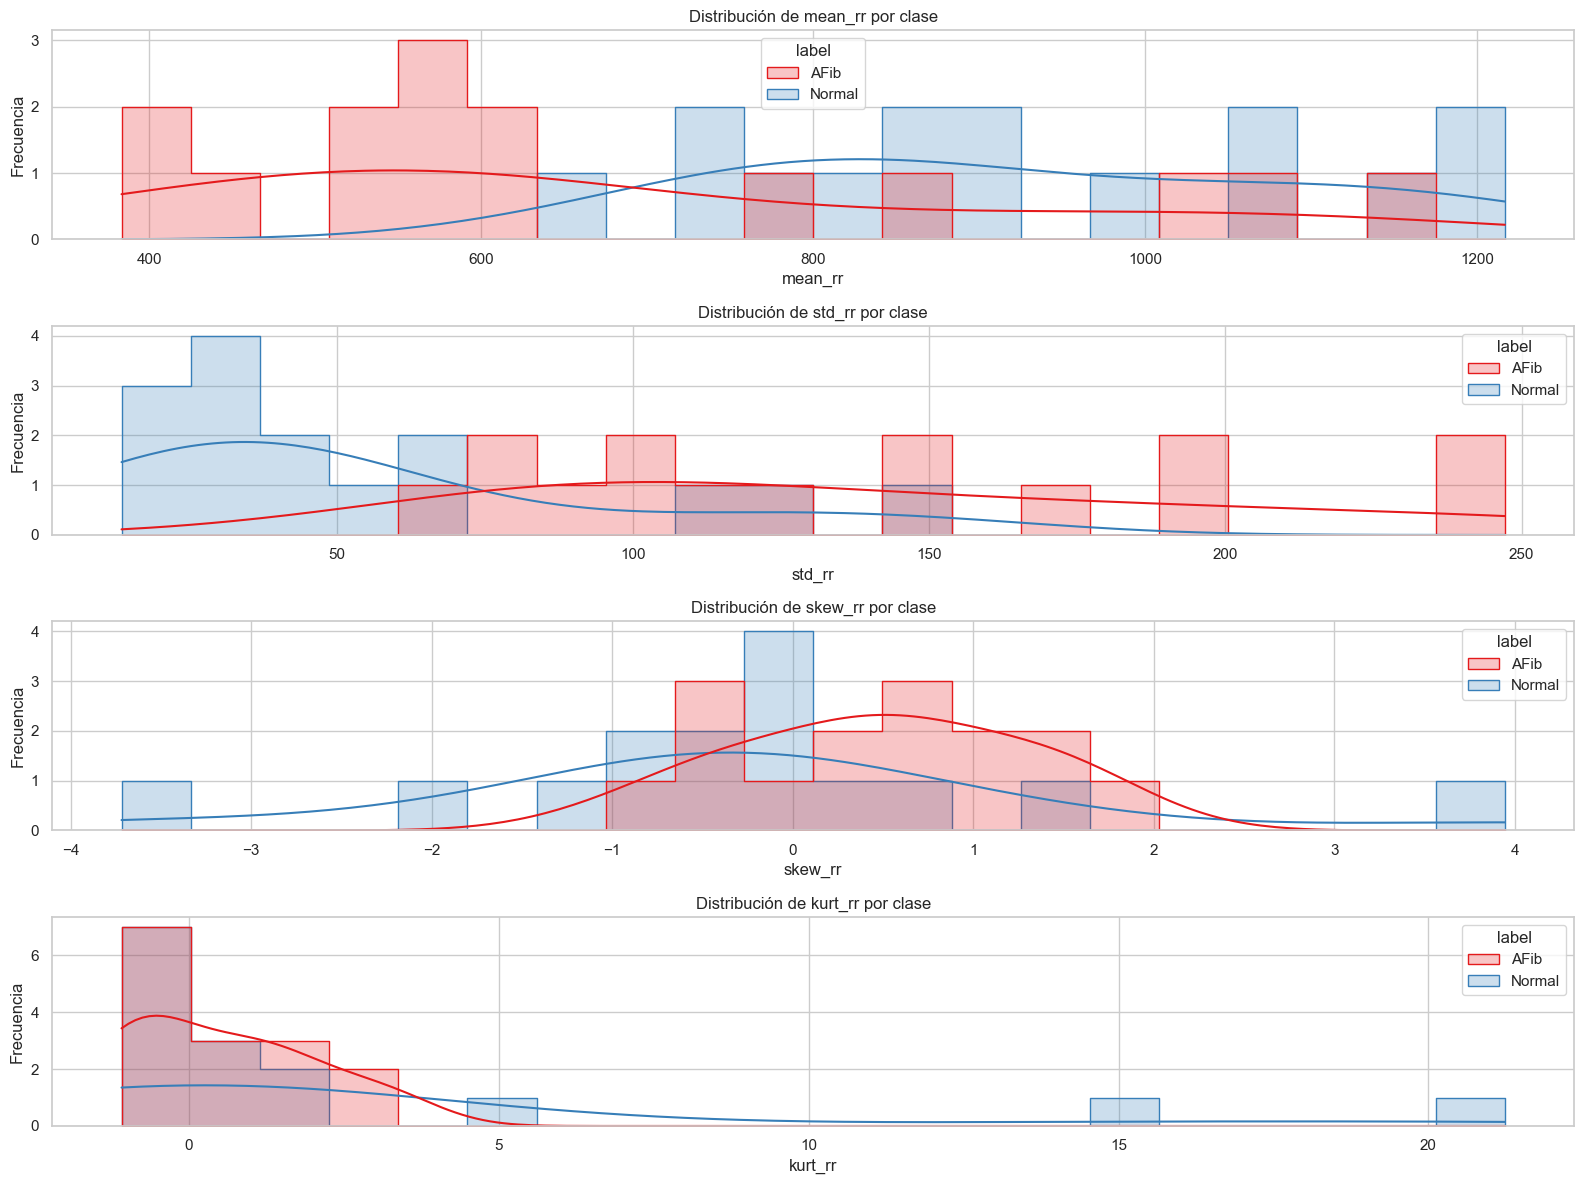

In [11]:
# Cargar la muestra balanceada
df = pd.read_csv("ecg_muestra_balanceada.csv")

# Mostrar una inspección rápida
print("Resumen del dataset:\n")
print(df.info())
print("\nPrimeras filas:")
print(df.head())
print("\nResumen estadístico:")
print(df.describe())

# Obtener solo las columnas numéricas (excluyendo la etiqueta)
features = df.select_dtypes(include='number').columns

# Configurar estilo
sns.set(style="whitegrid")
plt.figure(figsize=(16, len(features) * 3))

# Generar un histograma por cada feature
for i, feature in enumerate(features):
    plt.subplot(len(features), 1, i + 1)
    sns.histplot(data=df, x=feature, hue="label", kde=True, element="step", palette='Set1', bins=20)
    plt.title(f'Distribución de {feature} por clase')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


## Conclusiones

- Algunas variables como **rmssd** y **pnn50** muestran diferencias notables entre clases (por ejemplo, AFib tiende a tener valores mayores).
- La variable **mean_rr** también presenta una distribución distinta en pacientes con fibrilación auricular (ritmos más irregulares).
- Se observan **outliers** en algunas variables como `nn50`, lo cual podría reflejar la variabilidad extrema en ciertos casos.
- En general, el dataset está limpio, bien etiquetado, y permite ya desde esta etapa observar **tendencias diferenciadoras** entre ritmo normal y AFib, lo que será útil para entrenar clasificadores más adelante.
